## Heart Failure Prediction | Explorative Data Analysis
### 1. Basic Information
* In this EDA we look at the [Heart Failure Dataset from Kaggle](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction)
* We aim to get better understanding of the target variable and it's features
* We start with importing all the necessary libraries

In [264]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import metrics

import warnings

In [213]:
warnings.filterwarnings("ignore")

* read in data file '918_heart_failure_datase.csv' (original: heart.csv)
* check basic statistical metrics with .head(), .info(), .describe()
* check for duplicates

In [214]:
df = pd.read_csv('./data/918_heart_failure_datase.csv')

In [215]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [216]:
shape = df.shape
print(shape)

(918, 12)


In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [218]:
df_columns = df.columns
print(df_columns)

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')


* some numerical features have 0 or negative values as their minimum: `RestingBP`, `Cholesterol`, `FastingBS`, `Oldpeak`
* research wether negative values or 0 values are normal for these features


In [219]:
df.describe(include='all')

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918,918,918.000000,918.000000,918.000000,918,918.000000,918,918.000000,918,918.000000
unique,NaN,2,4,NaN,NaN,NaN,3,NaN,2,NaN,3,NaN
top,NaN,M,ASY,NaN,NaN,NaN,Normal,NaN,N,NaN,Flat,NaN
freq,NaN,725,496,NaN,NaN,NaN,552,NaN,547,NaN,460,NaN
mean,53.510893,NaN,NaN,132.396514,198.799564,0.233115,NaN,136.809368,NaN,0.887364,NaN,0.553377
std,9.432617,NaN,NaN,18.514154,109.384145,0.423046,NaN,25.460334,NaN,1.066570,NaN,0.497414
min,28.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,60.000000,NaN,-2.600000,NaN,0.000000
25%,47.000000,NaN,NaN,120.000000,173.250000,0.000000,NaN,120.000000,NaN,0.000000,NaN,0.000000
50%,54.000000,NaN,NaN,130.000000,223.000000,0.000000,NaN,138.000000,NaN,0.600000,NaN,1.000000
75%,60.000000,NaN,NaN,140.000000,267.000000,0.000000,NaN,156.000000,NaN,1.500000,NaN,1.000000


* no duplicates detected at first glance

In [220]:
df.duplicated().sum()

0

### 2. Data Visualization: Feature Specification

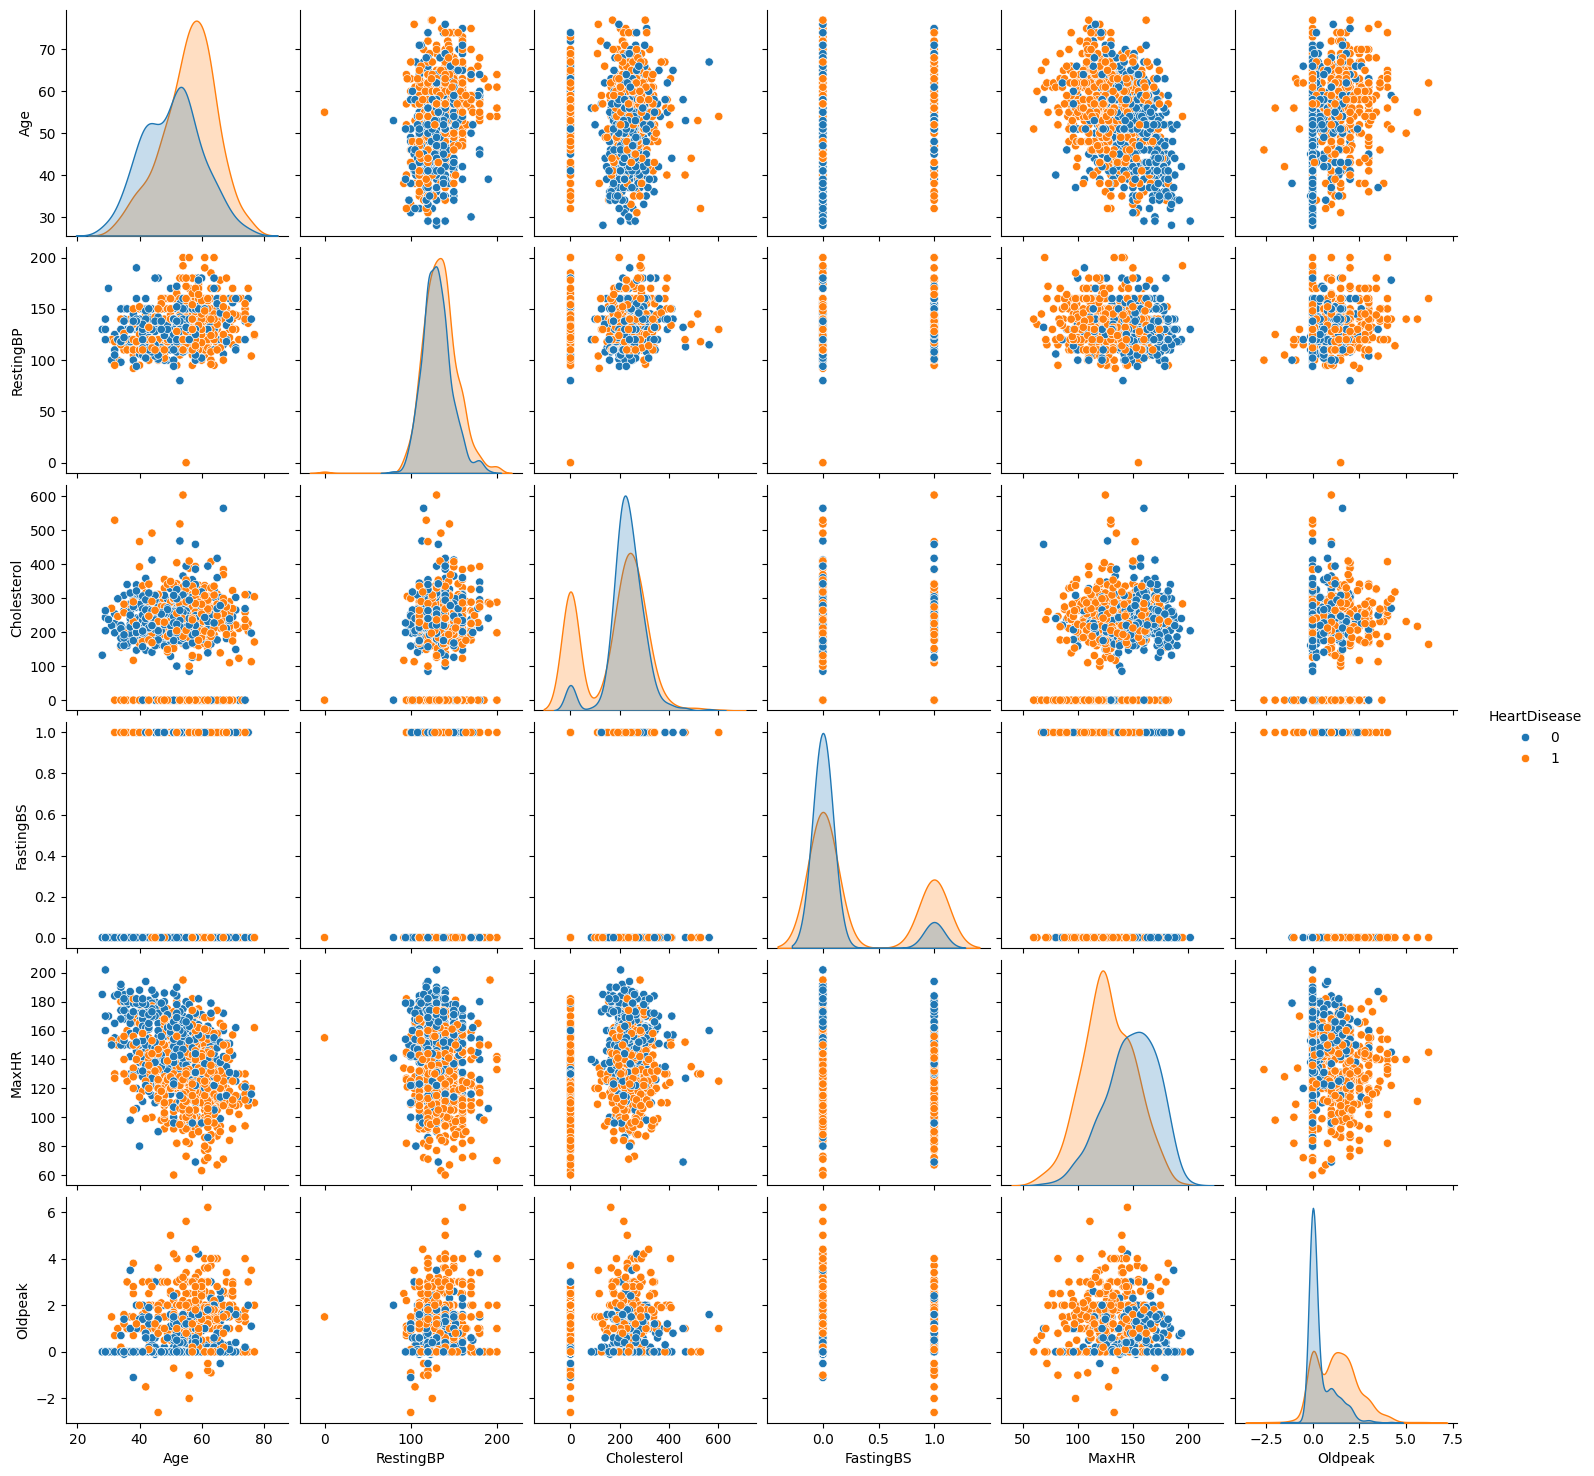

In [221]:
sns.pairplot(df, hue='HeartDisease')

#### Distribution of categorical features

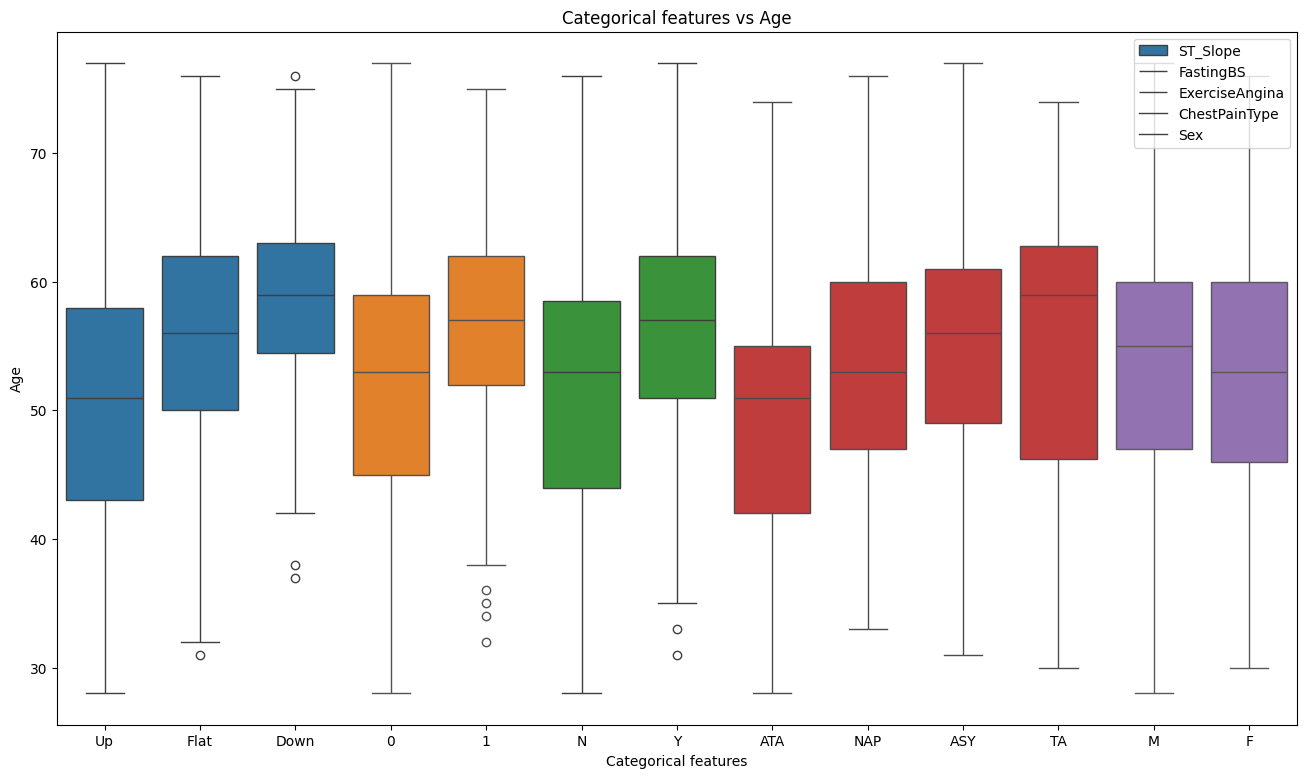

In [222]:
fig = plt.figure(figsize=(16,9))
box_columns = ['ST_Slope', 'FastingBS', 'ExerciseAngina', 'ChestPainType', 'Sex']

for i in box_columns:
    sns.boxplot(x=i, y='Age', data=df)

plt.legend(box_columns, loc='upper right')
plt.title('Categorical features vs Age')
plt.xlabel('Categorical features')
plt.ylabel('Age')
plt.show()

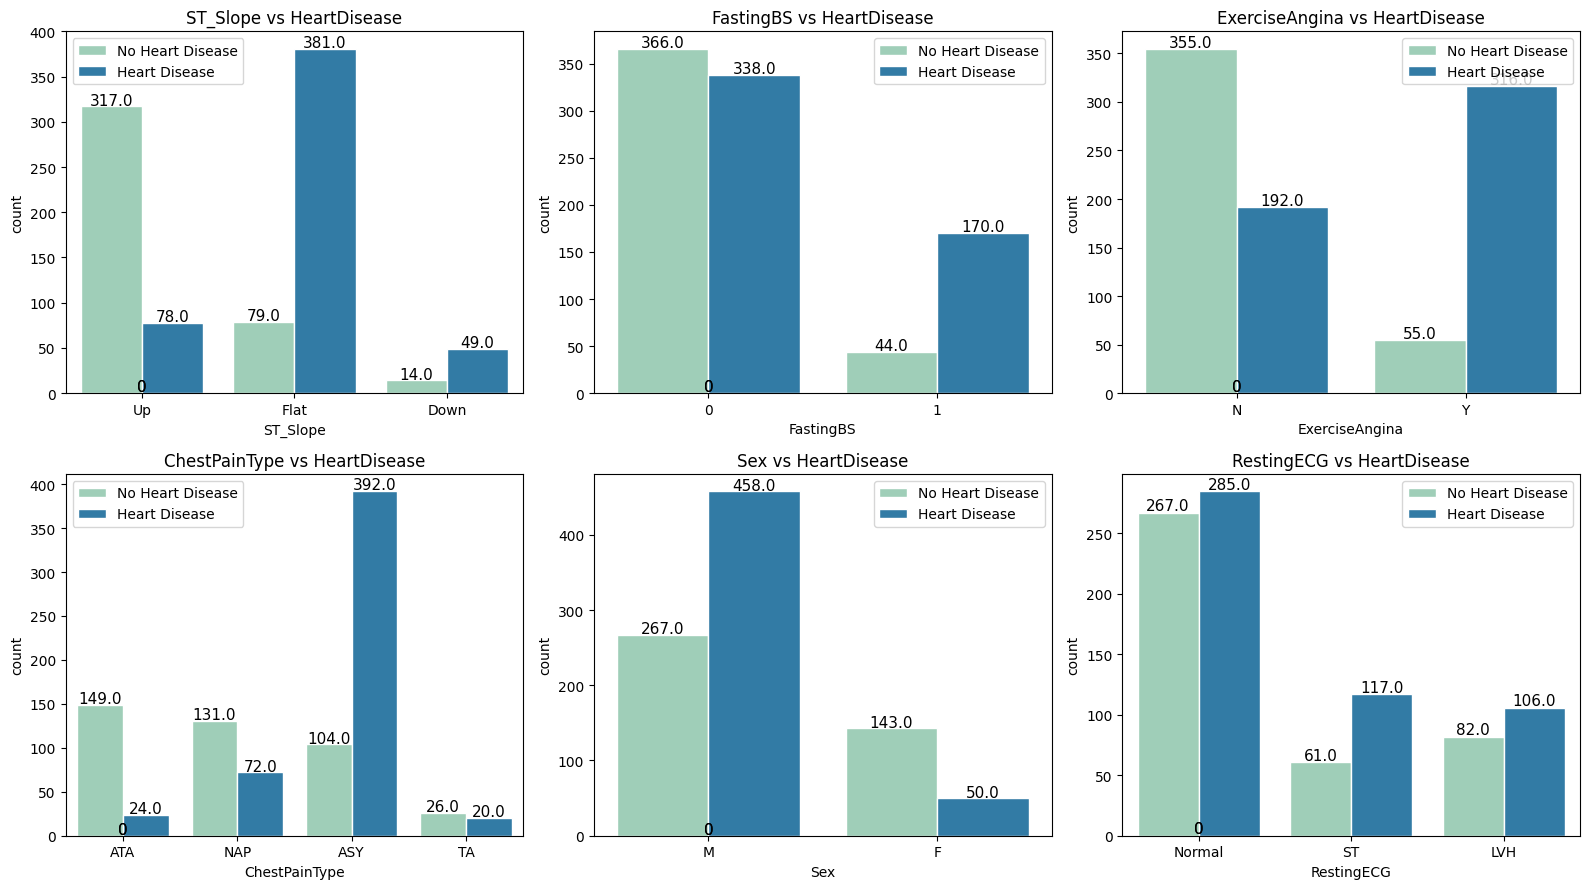

In [223]:
fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize = (16,9))

categorical_features = ['ST_Slope', 'FastingBS', 'ExerciseAngina', 'ChestPainType', 'Sex', 'RestingECG']


for i in range(len(categorical_features)):
    plt.subplot(2,3,i+1)
    ax = sns.countplot(x=df[categorical_features[i]], hue=df['HeartDisease'], palette = 'YlGnBu', edgecolor = 'white')
        
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, 
                rect.get_height() + 2, rect.get_height(), 
                horizontalalignment='center', fontsize = 11)
    
    title = categorical_features[i] + ' vs HeartDisease'

    fig.tight_layout()
    
    plt.legend(['No Heart Disease','Heart Disease'])
    plt.title(title)

#### Distribution of Heart Disease and Gender in the Data Set

<Axes: title={'center': 'Sex'}, ylabel='Percentage of gender in dataset'>

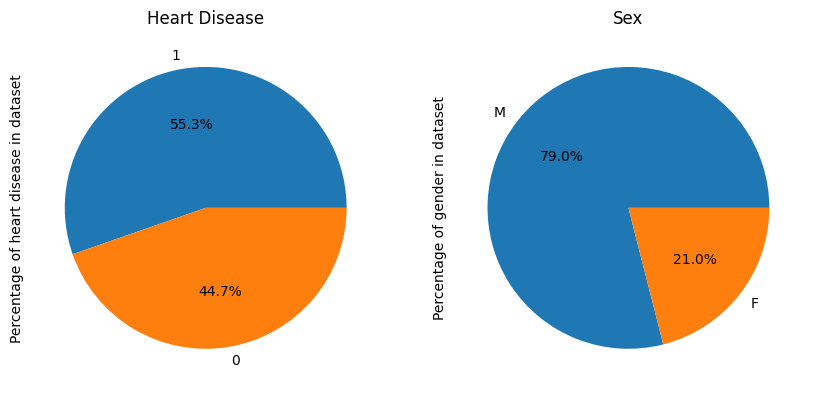

In [224]:
fig = plt.figure(figsize=(10,5))
plt.subplot(121)
df['HeartDisease'].value_counts().plot(kind='pie',autopct = '%1.1f%%', ylabel='Percentage of heart disease in dataset', title='Heart Disease')
plt.subplot(122)
df['Sex'].value_counts().plot(kind='pie',autopct = '%1.1f%%', ylabel='Percentage of gender in dataset', title= 'Sex')

#### Do Men suffer more often from Heart Disease than Women?

In [225]:
px.bar(df, x='Age', y="HeartDisease", color='Sex', 
       #facet_row='ExerciseAngina', 
       facet_col='Sex')

<Axes: title={'center': 'Female'}, ylabel='Percentage of Heart Disease'>

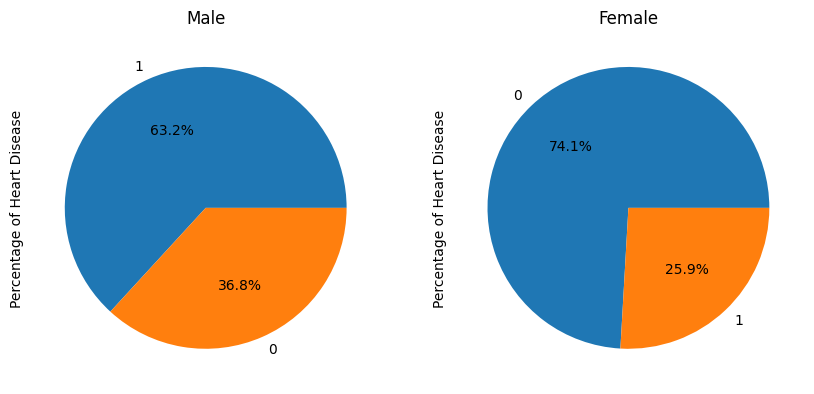

In [226]:
plt.figure(figsize=(10,5))
plt.subplot(121)
df[df['Sex'] == 'M']['HeartDisease'].value_counts().plot(kind = 'pie',autopct = '%1.1f%%', ylabel='Percentage of Heart Disease', title='Male')
plt.subplot(122)
df[df['Sex'] == 'F']['HeartDisease'].value_counts().plot(kind = 'pie',autopct = '%1.1f%%', ylabel='Percentage of Heart Disease', title= 'Female')

### 3. Encoding Categorical Features

#### Label Enconding for not tree based algorithms
* computers connot process categorical data that is expressed in strings, these categories need to be converted to numbers
* This can be done either by Label Encoding or with One Hot Encoding (Dummies)
* Tree based ML algorithms work best with Label Enconding whereas non-tree-based models work better with dummie encoding 
* Tree based algorithms are e.g.:
    * Decision trees
    * Random forest
    * Extra Trees
    * Or any kind of boosted trees model: XGBoost, GBM, LightGBM
* create copy of dataframe and convert object features (features to be converted)

In [227]:
feat_tbc = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

* Use SciKit Label Encoder rather than a loop because it offers options like re-transformation or information on  what objects were turned into which number

In [228]:
# create instance of Label Encoder
le = LabelEncoder()

# Create copy of Data Set 
df_label_enc = df.copy()

# Apply Label Encoding on selected features
df_label_enc[feat_tbc] = df_label_enc[feat_tbc].apply(le.fit_transform)

* All features are now numerical 

In [229]:
df_label_enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int64  
 2   ChestPainType   918 non-null    int64  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int64  
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int64  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int64  
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 86.2 KB


In [230]:
df_label_enc.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,0.789760,0.781046,132.396514,198.799564,0.233115,0.989107,136.809368,0.404139,0.887364,1.361656,0.553377
std,9.432617,0.407701,0.956519,18.514154,109.384145,0.423046,0.631671,25.460334,0.490992,1.066570,0.607056,0.497414
min,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,0.000000,120.000000,173.250000,0.000000,1.000000,120.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,0.000000,130.000000,223.000000,0.000000,1.000000,138.000000,0.000000,0.600000,1.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,267.000000,0.000000,1.000000,156.000000,1.000000,1.500000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,1.000000


In [231]:
for i in feat_tbc:
    print(f'Unique values in {i}: {df_label_enc[i].unique()}')

Unique values in Sex: [1 0]
Unique values in ChestPainType: [1 2 0 3]
Unique values in RestingECG: [1 2 0]
Unique values in ExerciseAngina: [0 1]
Unique values in ST_Slope: [2 1 0]


#### One Hot Enconding (Dummy Encoding)
* For not Tree based Machine Learning Algorithms categorical features need to be converted with One Hot Encoding (converting categorical variables into binary features) 
* Since the Baseline Model is Logistic regression, we need a data frame with binary categorical features
* The disadvantage is that the feature space can really blow up quickly and you start fighting with the curse of dimensionality
* Keeeping first column for interpretability

In [232]:
# Create copy of original Data Set for Dummy Encoding
df_onehot_enc = df.copy()

# Use get_dummies function to convert selected columns into dummy features (same as for Label Encoding)
df_onehot_enc = pd.get_dummies(df_onehot_enc, columns=feat_tbc, drop_first=False)

# See result
df_onehot_enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                918 non-null    int64  
 1   RestingBP          918 non-null    int64  
 2   Cholesterol        918 non-null    int64  
 3   FastingBS          918 non-null    int64  
 4   MaxHR              918 non-null    int64  
 5   Oldpeak            918 non-null    float64
 6   HeartDisease       918 non-null    int64  
 7   Sex_F              918 non-null    bool   
 8   Sex_M              918 non-null    bool   
 9   ChestPainType_ASY  918 non-null    bool   
 10  ChestPainType_ATA  918 non-null    bool   
 11  ChestPainType_NAP  918 non-null    bool   
 12  ChestPainType_TA   918 non-null    bool   
 13  RestingECG_LVH     918 non-null    bool   
 14  RestingECG_Normal  918 non-null    bool   
 15  RestingECG_ST      918 non-null    bool   
 16  ExerciseAngina_N   918 non

### 4. Handling 0 values
* The features `RestingBP`, `Cholesterol`, `FastingBS`, `Oldpeak` need to be inspected, whether 0 or negative values make sense here
* If 0 values are an indicator for missing data, they need to be imputed with either mean-imputation or KNN-imputation

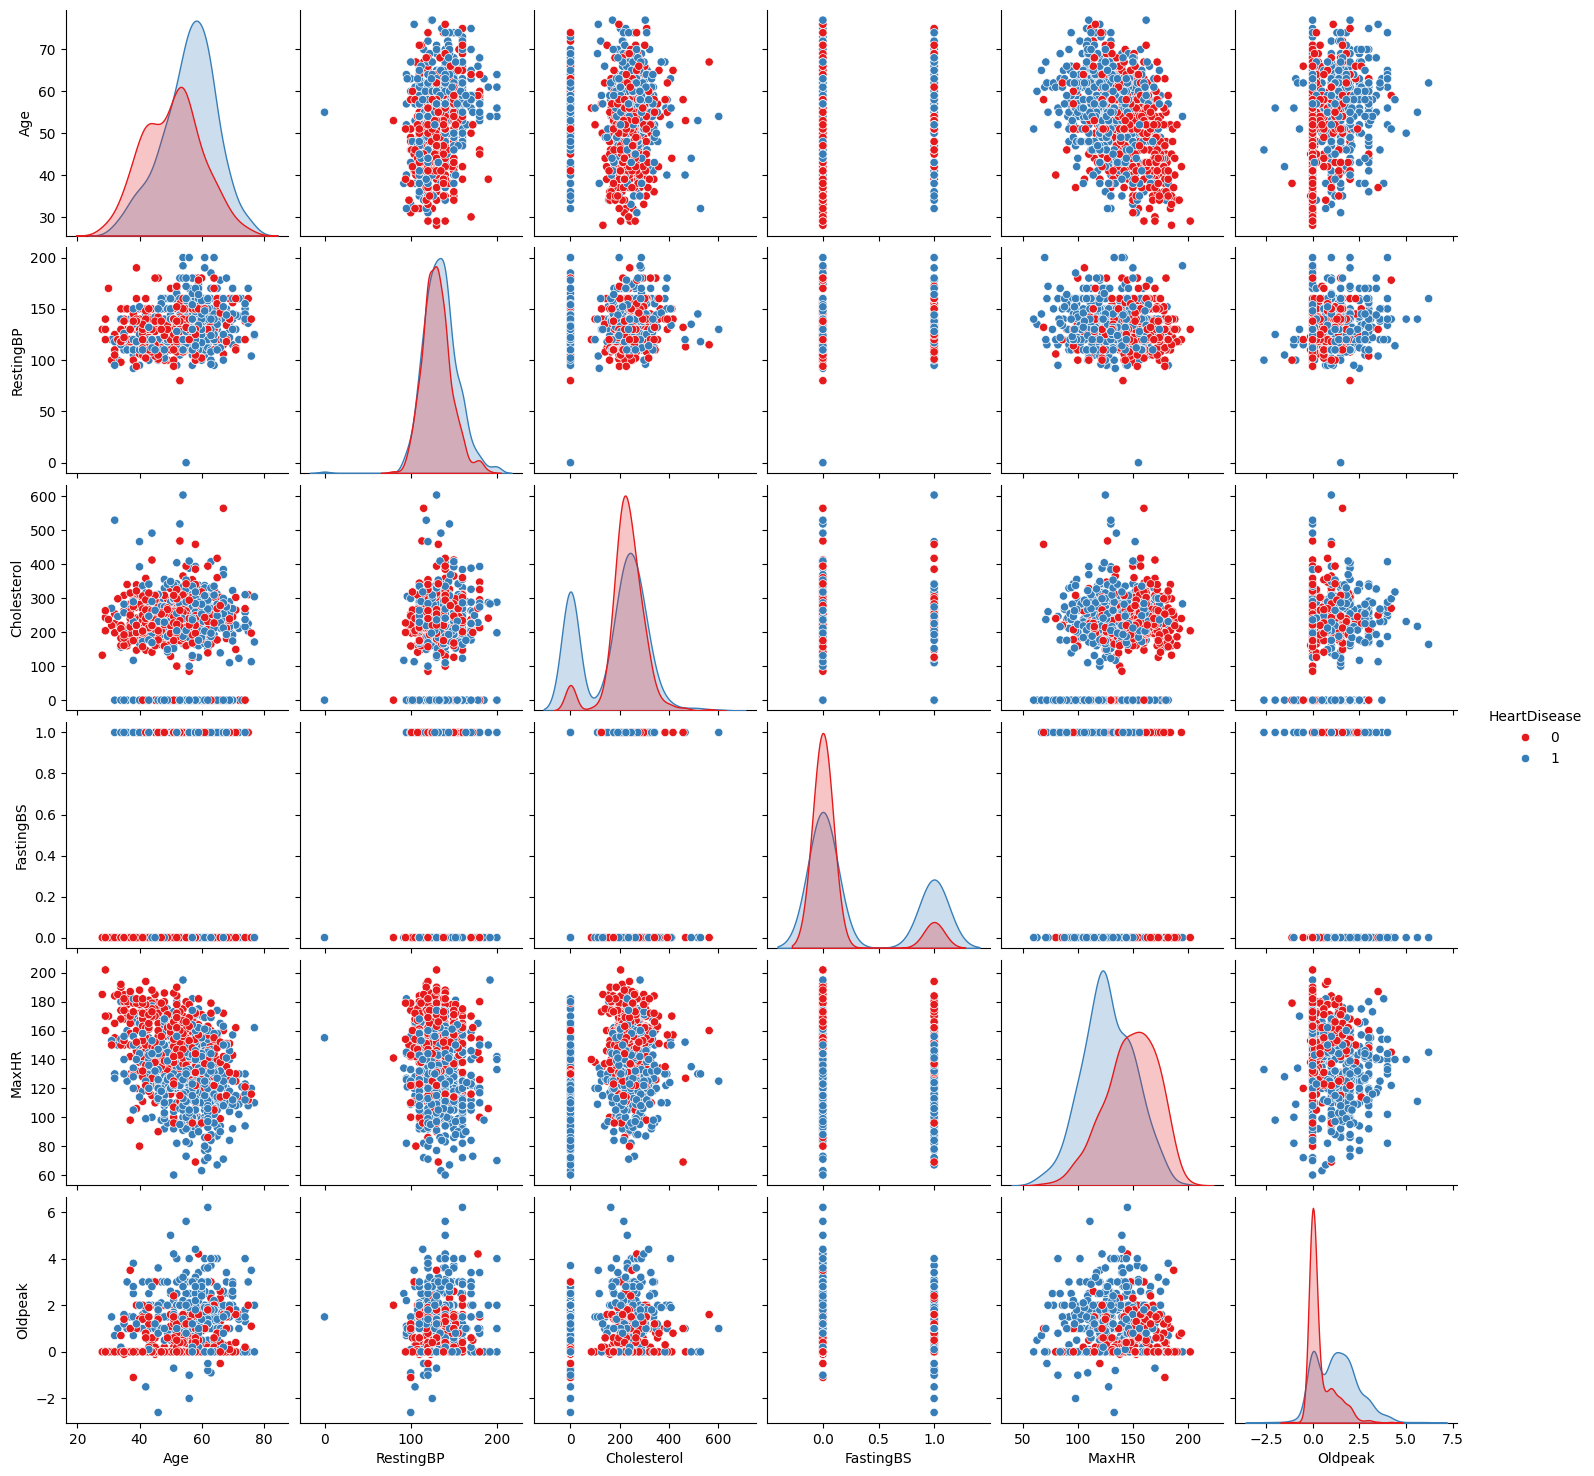

In [233]:
sns.pairplot(df, hue='HeartDisease', palette='Set1')

#### FastingBS
* The pairplot shows that FastingBS is actually a categorical variable: [1: if FastingBS > 120 mg/dl, 0: otherwise]
* 0 values make sense here, the feature stays as it is

#### Oldpeak
* Oldpeak is the ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot.)
* The values can indeed be negative or 0, zero generally indicating a good thing, whereas negative values are a concerning sign
* Taking this knowledge into consideration, the Oldpeak column stays as it is

In [234]:
print(f'0 values in Oldpeak: {sum(df['Oldpeak'] == 0)}')
print(f'negative values in Oldpeak: {sum(df['Oldpeak'] < 0)}')

0 values in Oldpeak: 368
negative values in Oldpeak: 13


#### Cholesterol
* The diagram and counting show that Cholesterol has 172 x 0 values
* 0 for Cholesterol does not make sense, they need to be imputed

<Axes: xlabel='Cholesterol', ylabel='Count'>

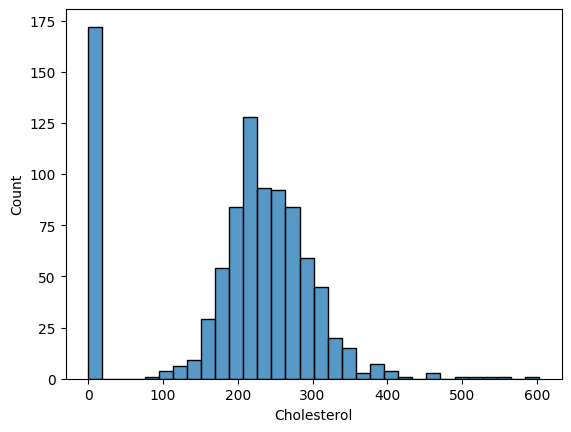

In [235]:
sns.histplot(df['Cholesterol'])

In [236]:
print(f'0 values in Cholesterol: {sum(df['Cholesterol'] == 0)}')

0 values in Cholesterol: 172


#### RestingBP
* shows one 0 value
* 0 for RestingBP does not make sense, needs to be imputed

<Axes: xlabel='RestingBP', ylabel='Count'>

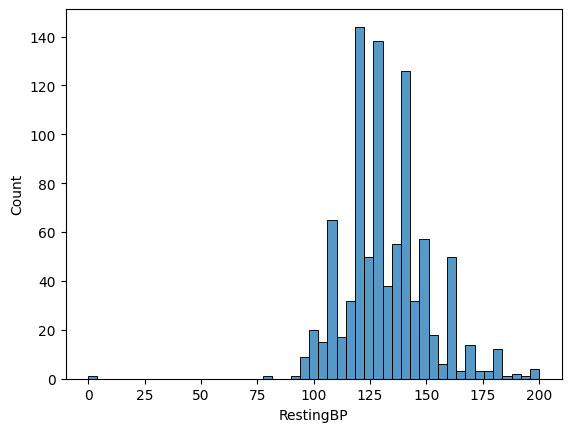

In [237]:
sns.histplot(df['RestingBP'])

In [238]:
print(f'0 values in RestingBP: {sum(df['RestingBP'] == 0)}')

0 values in RestingBP: 1


* From this analysis `Cholestorol` and `RestingBP` remain with 0 values that need to be imputed

In [239]:
features_tbi = ["Cholesterol", "RestingBP"]

#### Replacing 0 values with NaNs (Preparation for Imputation)
* We need to perform Imputation on both data frames (Label Encoded, One-Hot-Encoded) therefore we need to replace 0 values in both data frames with NaNs

In [240]:
# Creating copies for replacement procedure
df_label_nan = df_label_enc.copy()
df_onehot_nan = df_onehot_enc.copy()

# Replacing 0 values in specifies columns wir np.nans
df_label_nan[features_tbi] = df_label_nan[features_tbi].replace({'0':np.nan, 0:np.nan})
df_onehot_nan[features_tbi] = df_onehot_nan[features_tbi].replace({'0':np.nan, 0:np.nan})

* describe how much percent of each value are NaNs
* a column should be dropped if it contains > 70 % NaN values ([Source](https://medium.com/analytics-vidhya/how-to-handle-missing-values-cbd03fb79ef8))

In [241]:
for i in range(df_label_nan.shape[1]):
 # count number of rows with missing values
 n_miss = df_label_nan.iloc[:, i].isnull().sum()
 perc = n_miss / df_label_nan.shape[0] * 100
 print('> %d, Missing: %d (%.1f%%)' % (i, n_miss, perc))

> 0, Missing: 0 (0.0%)
> 1, Missing: 0 (0.0%)
> 2, Missing: 0 (0.0%)
> 3, Missing: 1 (0.1%)
> 4, Missing: 172 (18.7%)
> 5, Missing: 0 (0.0%)
> 6, Missing: 0 (0.0%)
> 7, Missing: 0 (0.0%)
> 8, Missing: 0 (0.0%)
> 9, Missing: 0 (0.0%)
> 10, Missing: 0 (0.0%)
> 11, Missing: 0 (0.0%)


In [242]:
for i in range(df_onehot_nan.shape[1]):
 # count number of rows with missing values
 n_miss = df_onehot_nan.iloc[:, i].isnull().sum()
 perc = n_miss / df_onehot_nan.shape[0] * 100
 print('> %d, Missing: %d (%.1f%%)' % (i, n_miss, perc))

> 0, Missing: 0 (0.0%)
> 1, Missing: 1 (0.1%)
> 2, Missing: 172 (18.7%)
> 3, Missing: 0 (0.0%)
> 4, Missing: 0 (0.0%)
> 5, Missing: 0 (0.0%)
> 6, Missing: 0 (0.0%)
> 7, Missing: 0 (0.0%)
> 8, Missing: 0 (0.0%)
> 9, Missing: 0 (0.0%)
> 10, Missing: 0 (0.0%)
> 11, Missing: 0 (0.0%)
> 12, Missing: 0 (0.0%)
> 13, Missing: 0 (0.0%)
> 14, Missing: 0 (0.0%)
> 15, Missing: 0 (0.0%)
> 16, Missing: 0 (0.0%)
> 17, Missing: 0 (0.0%)
> 18, Missing: 0 (0.0%)
> 19, Missing: 0 (0.0%)
> 20, Missing: 0 (0.0%)


#### KNN Imputation
* The default distance measure is a Euclidean distance measure that is NaN aware, e.g. will not include NaN values when calculating the distance between members of the training dataset. This is set via the “metric” argument.
* The number of neighbors is set to five by default and can be configured by the “n_neighbors” argument.
* [Source](https://machinelearningmastery.com/knn-imputation-for-missing-values-in-machine-learning/)
* Used for the Label Encoded Data Frame

In [243]:
df_label_knn = df_label_nan.copy()

In [244]:
# Create instance of imputer
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')

# define area of df for imputation
X = df_label_knn.drop('HeartDisease', axis=1)

# define columns to build dataframe later on
X_columns = X.columns

# Fit imputer on X
df_label_knn = imputer.fit_transform(X)

* Build Data Frame from arrays

In [245]:
df_label_knn = pd.DataFrame(data=df_label_knn, columns=X_columns)
df_label_knn = pd.concat([df_label_knn, df['HeartDisease']], axis=1)

In [246]:
df_label_knn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    float64
 1   Sex             918 non-null    float64
 2   ChestPainType   918 non-null    float64
 3   RestingBP       918 non-null    float64
 4   Cholesterol     918 non-null    float64
 5   FastingBS       918 non-null    float64
 6   RestingECG      918 non-null    float64
 7   MaxHR           918 non-null    float64
 8   ExerciseAngina  918 non-null    float64
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    float64
 11  HeartDisease    918 non-null    int64  
dtypes: float64(11), int64(1)
memory usage: 86.2 KB


In [247]:
df_label_knn.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40.0,1.0,1.0,140.0,289.0,0.0,1.0,172.0,0.0,0.0,2.0,0
1,49.0,0.0,2.0,160.0,180.0,0.0,1.0,156.0,0.0,1.0,1.0,1
2,37.0,1.0,1.0,130.0,283.0,0.0,2.0,98.0,0.0,0.0,2.0,0
3,48.0,0.0,0.0,138.0,214.0,0.0,1.0,108.0,1.0,1.5,1.0,1
4,54.0,1.0,2.0,150.0,195.0,0.0,1.0,122.0,0.0,0.0,2.0,0


#### Mean Imputation
* We use Mean imputation on the One-Hot-Encoded data frame

In [248]:
mean_rbp = df_onehot_nan['RestingBP'].mean()
mean_chol = df_onehot_nan['Cholesterol'].mean()

print(f'{mean_rbp}, {mean_chol}')

132.54089422028352, 244.6353887399464


In [249]:
# Create copy for mean Imputation
df_onehot_mean = df_onehot_nan.copy()

# Impute RestingBP column with mean-value
df_onehot_mean['RestingBP'] = df_onehot_mean['RestingBP'].fillna(mean_rbp)

# Impute Cholesterol column with mean-value
df_onehot_mean['Cholesterol'] = df_onehot_mean['Cholesterol'].fillna(mean_chol)

In [250]:
df_onehot_mean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                918 non-null    int64  
 1   RestingBP          918 non-null    float64
 2   Cholesterol        918 non-null    float64
 3   FastingBS          918 non-null    int64  
 4   MaxHR              918 non-null    int64  
 5   Oldpeak            918 non-null    float64
 6   HeartDisease       918 non-null    int64  
 7   Sex_F              918 non-null    bool   
 8   Sex_M              918 non-null    bool   
 9   ChestPainType_ASY  918 non-null    bool   
 10  ChestPainType_ATA  918 non-null    bool   
 11  ChestPainType_NAP  918 non-null    bool   
 12  ChestPainType_TA   918 non-null    bool   
 13  RestingECG_LVH     918 non-null    bool   
 14  RestingECG_Normal  918 non-null    bool   
 15  RestingECG_ST      918 non-null    bool   
 16  ExerciseAngina_N   918 non

In [251]:
df_onehot_mean.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.540894,244.635389,0.233115,136.809368,0.887364,0.553377
std,9.432617,17.989932,53.318029,0.423046,25.460334,1.066570,0.497414
min,28.000000,80.000000,85.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,214.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,244.635389,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


### 5. Feature Scaling
* Distance algorithms like KNN, SVM or K-means are sensitive to the different scales of the features
* Tree based Algorithms on the other hand are more insensitive to the range of the features

In [252]:
X_scale = df_onehot_mean[['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']].copy()
X_scale_columns = X_scale.columns

scaler = RobustScaler()
df_onehot_mean_scaled = scaler.fit_transform(X_scale)
df_onehot_mean_scaled = pd.DataFrame(df_onehot_mean_scaled, columns =X_scale_columns)

In [253]:
df_onehot_mean_scaled.describe()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
count,918.000000,918.000000,9.180000e+02,918.000000,918.000000
mean,-0.037624,0.127045,-1.896329e-16,-0.033073,0.191576
std,0.725586,0.899497,1.006001e+00,0.707232,0.711047
min,-2.000000,-2.500000,-3.011988e+00,-2.166667,-2.133333
25%,-0.538462,-0.500000,-5.780262e-01,-0.500000,-0.400000
50%,0.000000,0.000000,0.000000e+00,0.000000,0.000000
75%,0.461538,0.500000,4.219738e-01,0.500000,0.600000
max,1.769231,3.500000,6.761596e+00,1.777778,3.733333


In [254]:
df_onehot_mean.select_dtypes(include="bool")

,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,False,True,False,True,False,False,False,True,False,True,False,False,False,True
1,True,False,False,False,True,False,False,True,False,True,False,False,True,False
2,False,True,False,True,False,False,False,False,True,True,False,False,False,True
3,True,False,True,False,False,False,False,True,False,False,True,False,True,False
4,False,True,False,False,True,False,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,False,True,False,False,False,True,False,True,False,True,False,False,True,False
914,False,True,True,False,False,False,False,True,False,True,False,False,True,False
915,False,True,True,False,False,False,False,True,False,False,True,False,True,False
916,True,False,False,True,False,False,True,False,False,True,False,False,True,False


In [255]:
df_onehot_mean_scaled = pd.concat([df_onehot_mean_scaled, df_onehot_mean['FastingBS'],  
                                   df_onehot_mean.select_dtypes(include="bool"),
                                   df_onehot_mean['HeartDisease']], axis=1)

In [256]:
df_onehot_mean_scaled.head()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,FastingBS,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,...,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,HeartDisease
0,-1.076923,0.5,0.837068,0.944444,-0.400000,0,False,True,False,True,...,False,False,True,False,True,False,False,False,True,0
1,-0.384615,1.5,-1.219536,0.500000,0.266667,0,True,False,False,False,...,False,False,True,False,True,False,False,True,False,1
2,-1.307692,0.0,0.723861,-1.111111,-0.400000,0,False,True,False,True,...,False,False,False,True,True,False,False,False,True,0
3,-0.461538,0.4,-0.578026,-0.833333,0.600000,0,True,False,True,False,...,False,False,True,False,False,True,False,True,False,1
4,0.000000,1.0,-0.936517,-0.444444,-0.400000,0,False,True,False,False,...,False,False,True,False,True,False,False,False,True,0


### 6. Modeling
#### Baseline Model: Logistic Regression
* We chose Logistic Regression for the baseline model, as it is designed for binary outcomes 
* It will help us in understanding the influence of each feature on the target variable
* Logistic Regression is a Linear model → simple and efficient baseline and a good reference point for comparing against more complex models


In [258]:
X_train, X_test, y_train, y_test = train_test_split(df_onehot_mean_scaled.drop('HeartDisease', axis=1), 
                                                    df_onehot_mean_scaled['HeartDisease'], 
                                                    test_size=0.33, 
                                                    random_state=42)

In [260]:
# Create Instance of Logistic Regression
logm = LogisticRegression()

# Fit Model to train data
logm.fit(X_train, y_train)

LogisticRegression()

In [261]:
predictions = logm.predict(X_test)

In [262]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       123
           1       0.93      0.83      0.88       180

    accuracy                           0.86       303
   macro avg       0.86      0.87      0.86       303
weighted avg       0.87      0.86      0.86       303



In [274]:
print(confusion_matrix(y_test, predictions))

[[111  12]
 [ 30 150]]


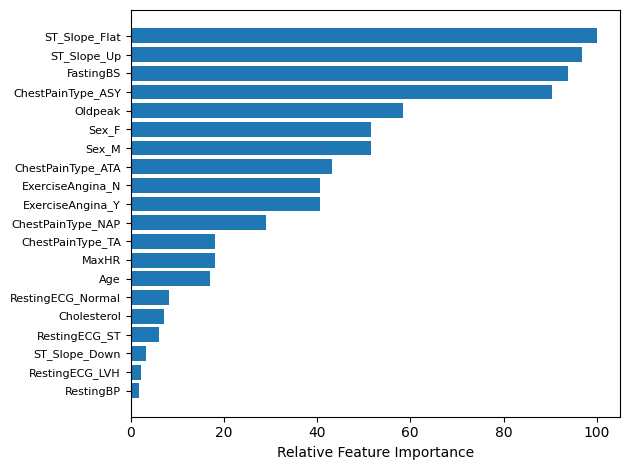

In [263]:
feature_importance = abs(logm.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure()
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X_test.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')

plt.tight_layout()   
plt.show()

In [265]:
fpr, tpr, _ = metrics.roc_curve(y_test, predictions)
roc_auc = metrics.auc(fpr, tpr)
roc_auc = round(roc_auc, 2)

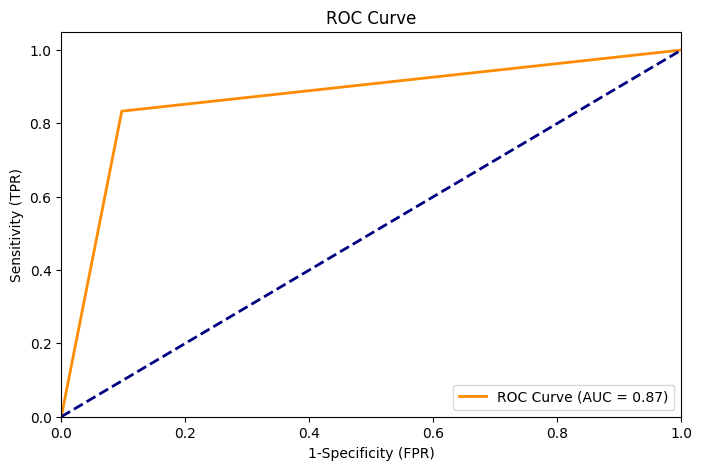

In [266]:
plt.figure(figsize=(8, 5)) # set figure size

plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc})') # plot fpr against tpr
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') # plot random regression

plt.xlim([0.0, 1.0]) # set x limits
plt.ylim([0.0, 1.05]) # set y limits

plt.xlabel('1-Specificity (FPR)') # set x label
plt.ylabel('Sensitivity (TPR)') # set y label

plt.title('ROC Curve') # give title

plt.legend(loc="lower right") # legend position

plt.show()